<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Defining-Functions" data-toc-modified-id="Defining-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Defining Functions</a></span></li><li><span><a href="#Reading-the-Data" data-toc-modified-id="Reading-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading the Data</a></span><ul class="toc-item"><li><span><a href="#Cleaning-Date-Columns" data-toc-modified-id="Cleaning-Date-Columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleaning Date Columns</a></span></li></ul></li><li><span><a href="#Graphical-Exploration" data-toc-modified-id="Graphical-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graphical Exploration</a></span></li></ul></div>

This notebook was created to analyze data from Kaggle's dataset `Corona Virus`. The goal is to go through the data and extract relevant information about the global virus. In parallel we will apply useful Python tools to explore graphs and get insights from the data provided.

# Importing Libraries

In [75]:
# Libs to be used on this project
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Defining Functions

In [27]:
# Formatting matplotlib figures
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

# Reading the Data

First of all, let's read the files provided and look into each one to see its content.

In [2]:
# Whats in the zip file provided?
data_path = r'D:\Users\thiagoPanini\github_files\kaggle_challenges\kernels\08_corona_virus\data'
datasets = [d for d in os.listdir(data_path) if '.csv' in d]
datasets

['2019_nCoV_data.csv',
 'covid_19_data.csv',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_recovered.csv']

In [3]:
# Reading the updated corona virus dataset
df_corona = pd.read_csv(data_path + f'\covid_19_data.csv')
df_corona.columns = [c.lower().replace(' ', '_').replace('/', '_') for c in df_corona.columns]
df_corona.head()

,sno,observationdate,province_state,country_region,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


According to the dataset documentation, we have below the explanation for each columns of this data:

- **sno:** serial number;
- **observationdate:** observation date in the format MM/DD/YYYY;
- **province_state:** province or state of the observation (could be empty when missing);
- **country_region:** country of observation;
- **last_update:** time in UTC at wich the row is updated for the given province or country;
- **confirmed**: cumulative number of confirmed cases till that date;
- **deaths:** cumulative number of deaths till that date;
- **recovered:** cumulative number of recovered cases till that date

In [4]:
# Dimensions of the data
df_corona.shape

(2699, 8)

## Cleaning Date Columns

Also according to the documentation, it's necessary to pay attention with the date columns (`observationdate` and `last_update`). It's possible to face some unformatted entries. Let's take a look at the data types.

In [5]:
# Data types
df_corona.dtypes

sno                  int64
observationdate     object
province_state      object
country_region      object
last_update         object
confirmed          float64
deaths             float64
recovered          float64
dtype: object

Let's now see the format of all the dates included on the data

In [6]:
# Observation dates
df_corona['observationdate'].value_counts().sort_index()

01/22/2020     38
01/23/2020     46
01/24/2020     41
01/25/2020     44
01/26/2020     47
01/27/2020     51
01/28/2020     52
01/29/2020     54
01/30/2020     58
01/31/2020     62
02/01/2020     67
02/02/2020     67
02/03/2020     68
02/04/2020     70
02/05/2020     71
02/06/2020     71
02/07/2020     72
02/08/2020     72
02/09/2020     72
02/10/2020     72
02/11/2020     73
02/12/2020     73
02/13/2020     74
02/14/2020     75
02/15/2020     75
02/16/2020     75
02/17/2020     75
02/18/2020     75
02/19/2020     76
02/20/2020     76
02/21/2020     84
02/22/2020     84
02/23/2020     85
02/24/2020     90
02/25/2020     94
02/26/2020    101
02/27/2020    105
02/28/2020    114
Name: observationdate, dtype: int64

In [7]:
# Updated date
for dt_idx in df_corona['last_update'].value_counts().sort_index().index:
    print(dt_idx)

1/22/2020 17:00
1/23/20 17:00
1/24/20 17:00
1/25/20 17:00
1/26/20 16:00
1/27/20 23:59
1/28/20 23:00
1/29/20 19:30
1/30/20 16:00
1/31/2020 10:37
1/31/2020 15:20
1/31/2020 16:13
1/31/2020 23:59
1/31/2020 8:15
2/1/2020 10:33
2/1/2020 10:43
2/1/2020 10:53
2/1/2020 11:03
2/1/2020 11:53
2/1/2020 13:33
2/1/2020 14:03
2/1/2020 14:23
2/1/2020 15:23
2/1/2020 15:43
2/1/2020 15:53
2/1/2020 17:43
2/1/2020 18:12
2/1/2020 18:33
2/1/2020 18:53
2/1/2020 19:43
2/1/2020 19:53
2/1/2020 1:52
2/1/2020 2:13
2/1/2020 5:37
2/1/2020 6:05
2/1/2020 7:38
2/1/2020 7:51
2/1/2020 8:43
2/1/2020 9:17
2020-01-31T08:15:53
2020-01-31T10:37:00
2020-01-31T15:20:56
2020-01-31T16:13:45
2020-02-01T01:52:40
2020-02-01T02:13:26
2020-02-01T07:38:12
2020-02-01T18:12:49
2020-02-01T18:53:03
2020-02-01T19:43:03
2020-02-01T19:53:03
2020-02-01T23:43:02
2020-02-02T00:23:13
2020-02-02T00:43:02
2020-02-02T01:03:32
2020-02-02T01:43:02
2020-02-02T02:23:13
2020-02-02T02:33:02
2020-02-02T02:53:02
2020-02-02T03:23:14
2020-02-02T03:33:07
2020-0

Well, we could see that the column `last_update` have different date formats and needs to be cleaned.

In [22]:
# Cleaning last_update column
df_corona['last_update_cleaned'] = pd.to_datetime(df_corona['last_update']).dt.date
df_corona['obs_date_cleaned'] = pd.to_datetime(df_corona['observationdate']).dt.date
df_corona.drop(['last_update', 'observationdate'], axis=1, inplace=True)
df_corona.columns = ['sno', 'province_state', 'country_region', 'confirmed', 
                     'deaths', 'recovered', 'observation_date', 'last_update']
df_corona.head()

,sno,province_state,country_region,confirmed,deaths,recovered,observation_date,last_update
0,1,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22,2020-01-22
1,2,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22,2020-01-22
2,3,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22,2020-01-22
3,4,Fujian,Mainland China,1.0,0.0,0.0,2020-01-22,2020-01-22
4,5,Gansu,Mainland China,0.0,0.0,0.0,2020-01-22,2020-01-22


In [23]:
# Observation and update dates
print(f'Range of observation date: from {df_corona["observation_date"].min()} to {df_corona["observation_date"].max()}\n')
print(f'Range of update date: from {df_corona["last_update"].min()} to {df_corona["last_update"].max()}')

Range of observation date: from 2020-01-22 to 2020-02-28

Range of update date: from 2020-01-22 to 2020-02-28


# Graphical Exploration

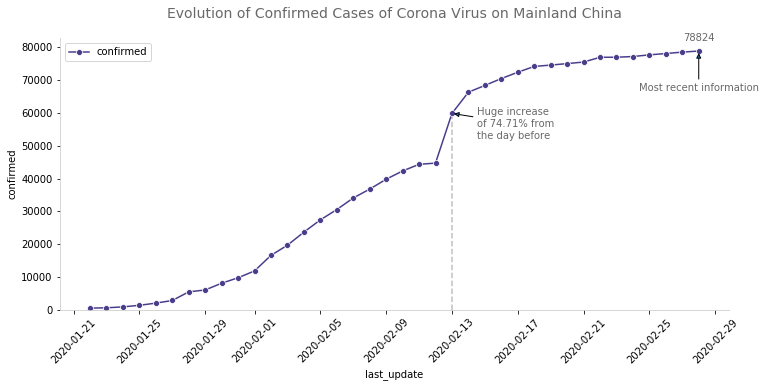

In [132]:
# Virus evolution on Mainland China
main_china = df_corona.query('country_region == "Mainland China"')

# Grouping data
cols_group = ['last_update', 'country_region', 'confirmed', 'deaths', 'recovered']
china_sum = main_china.groupby(by=['last_update', 'country_region'], as_index=False).sum().loc[:, cols_group]

# Showing confirmed cases of corona virus on Mainland China
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x='last_update', y='confirmed', data=china_sum, ax=ax, color='darkslateblue', label='confirmed', marker='o')

# Making some annotations
x_highlight = china_sum['last_update'][22]
y_highlight = china_sum['confirmed'][22]
highlight_perc_increase = 100 * (china_sum['confirmed'][21] / china_sum['confirmed'][22])
ax.annotate(f'Huge increase\nof {highlight_perc_increase:.2f}% from \nthe day before', 
            (mdates.date2num(x_highlight), y_highlight), 
            xytext=(25, -25),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), color='dimgrey')
plt.vlines(x_highlight, 0, y_highlight, linestyle="dashed", color='silver')

# Showing the most recent information
xs = china_sum['last_update'][-1:]
ys = china_sum['confirmed'][-1:]
for x, y in zip(xs, ys):
    label = f"{int(y)}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', color='dimgrey')
    
# Making another annotations
ax.annotate(f'Most recent information', 
            (mdates.date2num(china_sum['last_update'][-1:]), china_sum['confirmed'][-1:]), 
            xytext=(-60, -40),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'), color='dimgrey')
   
# Finishing plot
ax.set_title('Evolution of Confirmed Cases of Corona Virus on Mainland China', size=14, color='dimgrey', pad=20)
ax.set_ylim(ymin=0)
format_spines(ax, right_border=False)
plt.xticks(rotation=45)
plt.show()